# 7. Monte Carlo 

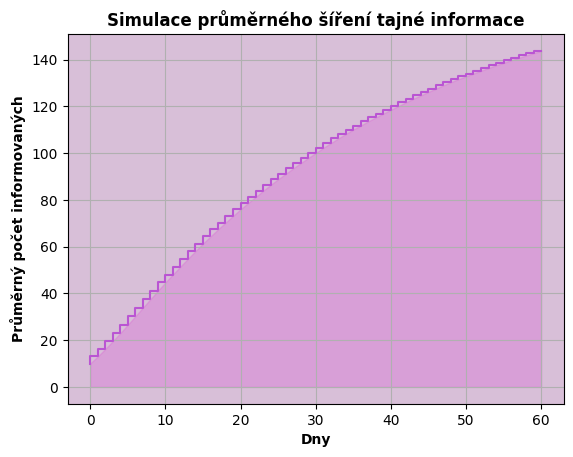

In [2]:
# 1. Simulace šíření tajné zprávy

import random
import numpy as np
import matplotlib.pyplot as plt

# Na přednášce algoritmizace a programování bylo jednoho dne 10 lidí (pocet_zucastnenych) ze 180 zapsaných (pocet_zapsanych).
# Padla tam velmi důležitá tajná zpráva. Pravděpodobnost, že jeden z 10 účastněných o této zprávě řekně dál je 10% (pravdeodobnost_sdileni).
# Každý, kdo tuto informaci zná se o ní nadále podělí se 2 dalšími studenty (rozsah_vlivu).
# Kolik studentů ze 180 bude informaci znát po 2 měsících (pocet_dni)?

def monte_carlo(pocet_simulaci=1000, pocet_zapsanych=180, pocet_zucastnenych=10, pravdepodobnost_sdileni=0.1, rozsah_vlivu=2, pocet_dni=60):

    prumerny_pocet_informovanych = np.zeros(pocet_dni + 1)

    for simulace in range(pocet_simulaci):
        status_studenta = np.zeros(pocet_zapsanych)
        indexy_zacatecne_informovanych = random.sample(range(pocet_zapsanych), pocet_zucastnenych)
        status_studenta[indexy_zacatecne_informovanych] = 1
        pocet_informovanych = [sum(status_studenta)]
        for den in range(pocet_dni):
            for student in range(pocet_zapsanych):
                if status_studenta[student] == 1:
                    for kontakt in range(student - rozsah_vlivu, student + rozsah_vlivu):
                        if 0 <= kontakt < pocet_zapsanych and random.random() < pravdepodobnost_sdileni:
                            status_studenta[kontakt] = 1
            pocet_informovanych.append(sum(status_studenta))
        prumerny_pocet_informovanych += np.array(pocet_informovanych)
    prumerny_pocet_informovanych /= pocet_simulaci
    return prumerny_pocet_informovanych

def vykreslit_graf(prumerny_pocet_informovanych, pocet_dni):
    plt.step(range(pocet_dni + 1), prumerny_pocet_informovanych, color="mediumorchid")
    plt.fill_between(range(pocet_dni + 1), prumerny_pocet_informovanych, color="orchid", alpha=0.4)
    plt.gca().set_facecolor("thistle")
    plt.title("Simulace průměrného šíření tajné informace", fontweight="bold")
    plt.xlabel("Dny", fontweight="bold")
    plt.ylabel("Průměrný počet informovaných", fontweight="bold")
    plt.grid(True)
    plt.show()

prumerny_pocet_informovanych = monte_carlo()
vykreslit_graf(prumerny_pocet_informovanych, pocet_dni=60)


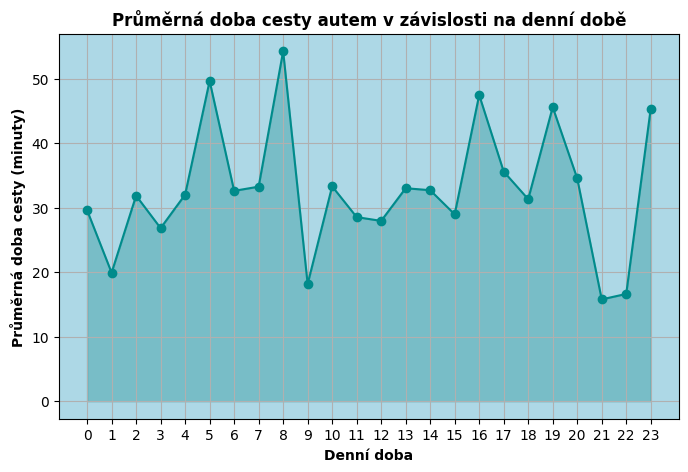

In [83]:
# 2

import random
import matplotlib.pyplot as plt

def cesta_autem(hustota_dopravy):
    délka_cesty = random.uniform(10, 30) * (1 + hustota_dopravy)
    return délka_cesty

def hustota_dopravy_generator():
    return random.uniform(0, 1)

def simulace_dne():
    hodiny = []
    průměrná_doba_cesty = []
    for hodina in range(24):
        hustota_dopravy = hustota_dopravy_generator()
        délka_cesty = cesta_autem(hustota_dopravy)
        hodiny.append(hodina)
        průměrná_doba_cesty.append(délka_cesty)
        #print(f"Denní doba: {hodina}:00 - {hodina+1}:00, Hustota dopravy: {hustota_dopravy}, Průměrná doba cesty: {délka_cesty} minut")

    plt.figure(figsize=(8,5))
    plt.plot(hodiny, průměrná_doba_cesty, marker='o', color="darkcyan")
    plt.gca().set_facecolor("lightblue")
    plt.fill_between(hodiny, 0, průměrná_doba_cesty, color="teal", alpha=0.3)
    plt.title('Průměrná doba cesty autem v závislosti na denní době', fontweight="bold")
    plt.xlabel('Denní doba', fontweight="bold")
    plt.ylabel('Průměrná doba cesty (minuty)', fontweight="bold")
    plt.xticks(range(24))
    plt.grid(True)
    plt.show()

simulace_dne()